In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import math
from matplotlib.mlab import PCA as mlabPCA

from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

This drill uses data from the Lending Club to predict the state of a loan given some information about it.

In [2]:
# The path for my data.
y2015 = pd.read_csv(
    'LoanStats3d.csv',
    skipinitialspace=True,
    header=1
)

In [3]:
# Convert Interest Rate to numeric.
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [4]:
# Remove two summary rows at the end that don't actually contain data.
y2015 = y2015[:-2]

This is the lesson's example of the cross validation score for the accuracy of the tree. Here we're about 98% accurate.
However, there are a few potential problems. In the lesson they didn't do much in the way of feature selection or model refinement. As such there are a lot of features in there that we don't really need. Some of them are actually quite impressively useless. There's also some variance in the scores. The fact that one gave us only 93% accuracy while others gave higher than 98 is concerning. This variance could be corrected by increasing the number of estimators. That will make it take even longer to run, however, and it is already quite slow.

In [9]:
rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

array([ 0.9853252 ,  0.98594225,  0.98627437,  0.98684429,  0.98572752,
        0.9836377 ,  0.98610748,  0.9843494 ,  0.9842544 ,  0.98342318])

# DRILL: Third Attempt
So here's your task. Get rid of as much data as possible without dropping below an average of 90% accuracy in a 10-fold cross validation.
You'll want to do a few things in this process. First, dive into the data that we have and see which features are most important. This can be the raw features or the generated dummies. You may want to use PCA or correlation matrices.
Can you do it without using anything related to payment amount or outstanding principal? How do you know?

I begin by dropping all the columns with null values

In [5]:
y2015=y2015.dropna(axis=1,how='any')

I am approaching this drill by transforming my data with a PCA. I started by dropping the loan_status column and then changing the remaining features into the get_dummies dataframe. I  normalized the data. Then I start to recreate the PCA lesson by changing my data into a covariance matrix. 

In [6]:
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(X)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[  1.00000237e+00   1.00000237e+00   9.99996862e-01 ...,   0.00000000e+00
    4.63903124e-04  -4.63903124e-04]
 [  1.00000237e+00   1.00000237e+00   9.99996862e-01 ...,   0.00000000e+00
    4.63903124e-04  -4.63903124e-04]
 [  9.99996862e-01   9.99996862e-01   1.00000237e+00 ...,   0.00000000e+00
    5.02365659e-04  -5.02365659e-04]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  4.63903124e-04   4.63903124e-04   5.02365659e-04 ...,   0.00000000e+00
    1.00000237e+00  -1.00000237e+00]
 [ -4.63903124e-04  -4.63903124e-04  -5.02365659e-04 ...,   0.00000000e+00
   -1.00000237e+00   1.00000237e+00]]


I am now calculating the eigenvalues and eigenvectors. I then print out the total variance in the dataset explained by each component.

In [7]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

The percentage of total variance in the dataset explained by each component calculated by hand.
 [  9.19335446e-02 +0.00000000e+00j   5.28102054e-02 +0.00000000e+00j
   3.88057452e-02 +0.00000000e+00j   3.17492823e-02 +0.00000000e+00j
   3.08569313e-02 +0.00000000e+00j   2.75093150e-02 +0.00000000e+00j
   2.22510990e-02 +0.00000000e+00j   2.11214262e-02 +0.00000000e+00j
   1.96625984e-02 +0.00000000e+00j   1.79196570e-02 +0.00000000e+00j
   1.70009728e-02 +0.00000000e+00j   1.60684092e-02 +0.00000000e+00j
   1.50882798e-02 +0.00000000e+00j   1.46596976e-02 +0.00000000e+00j
   1.41459669e-02 +0.00000000e+00j   1.37780013e-02 +0.00000000e+00j
   1.30693950e-02 +0.00000000e+00j   1.23621896e-02 +0.00000000e+00j
   1.16908141e-02 +0.00000000e+00j   1.14870702e-02 +0.00000000e+00j
   1.11402688e-02 +0.00000000e+00j   2.63699502e-03 +0.00000000e+00j
   2.89134305e-03 +0.00000000e+00j   3.18198555e-03 +0.00000000e+00j
   2.24057280e-03 +0.00000000e+00j   3.72478616e-03 +0.00000000e+00j
   4.2

This is a basic plot of the eigenvalues

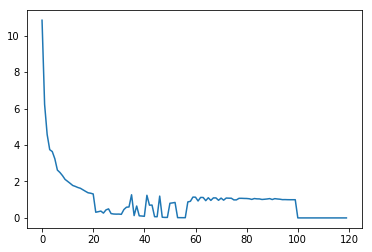

In [8]:
plt.plot(eig_val_cov)
plt.show()

The length of the eigenvector encodes the proportion of total variance explained by a component. The total variance is equal to the number of variables in the PCA. Thus, an Eigenvalue of 1 means that the component explains the same amount of variance as one variable. An eigenvalue greater than 1 is desirable, since a component with an eigenvalue of 1 adds no value beyond the information contained in any individual variable, and an eigenvalue of less than 1 is actually less efficient at conveying information than a variable by itself. Here I print out all the Eigenvalues that are greater than 1. 

In [9]:
for each in eig_val_cov:
    if each > 1:
        print(each)

(10.8481840263+0j)
(6.23161903474+0j)
(4.57908881191+0j)
(3.74642420991+0j)
(3.64112654392+0j)
(3.24610687539+0j)
(2.62563591759+0j)
(2.49233420566+0j)
(2.32019212581+0j)
(2.11452454778+0j)
(2.00611954919+0j)
(1.89607678663+0j)
(1.78042124046+0j)
(1.72984842673+0j)
(1.66922805543+0j)
(1.62580801118+0j)
(1.54219227269+0j)
(1.45874183367+0j)
(1.37951934157+0j)
(1.3554774995+0j)
(1.31455484047+0j)
(1.27023649369+0j)
(1.24186652867+0j)
(1.19728923054+0j)
(1.14381859037+0j)
(1.13692272346+0j)
(1.12532344898+0j)
(1.12039444938+0j)
(1.10589162716+0j)
(1.0993838598+0j)
(1.097452831+0j)
(1.08733464384+0j)
(1.09043311307+0j)
(1.08332149878+0j)
(1.08052800136+0j)
(1.07470618134+0j)
(1.07569476306+0j)
(1.06883766335+0j)
(1.06538778312+0j)
(1.05212126177+0j)
(1.01579525319+0j)
(1.06298906036+0j)
(1.04587917262+0j)
(1.04233072856+0j)
(1.01251192835+0j)
(1.02492658407+0j)
(1.0389943142+0j)
(1.06011621276+0j)
(1.00891046901+0j)
(1.05759787213+0j)
(1.03959106063+0j)
(1.02687473784+0j)
(1.00322723164+0j

At the end of the PCA lesson it says, "We then take $P$, choose the eigenvectors corresponding to the most variance explained ($P_{var}$), and use it to transform the original data $X$ (via $P_{var}X$) into $Y$, a new simplified dataset with as many columns as eigenvectors in ($P_{var}$)." 

In [16]:
# Create P, which we will use to transform Cx into Cy to get Y, the
# dimensionally-reduced representation of X.
P = eig_vec_cov[:, 0:40]

# Transform X into the new features.
X_new_features = P.T.dot(Xt)
# Transpose these new features into the correct matrix
new_features = X_new_features.T

Now I take this new simplified dataset and use in the random forest classifier with my outcome of interest, loan status. After running this model several times, I learned that 40 eigenvectors were required to reach an accuracy of 90%. 

In [17]:
rfc = ensemble.RandomForestClassifier()
cross_val_score(rfc, new_features, Y, cv=10)

array([ 0.900672  ,  0.90658245,  0.90612904,  0.91315808,  0.91343893,
        0.91006673,  0.9037023 ,  0.89521932,  0.87462892,  0.8145439 ])